# Modulo 3 - Linearização de Equações Diferenciais

A linearização é o processo de tomar o gradiente de uma função não linear em relação a todas as variáveis e criar uma representação linear nesse ponto. É necessário para certos tipos de análise, tais como análise de estabilidade, solução com uma transformação Laplace, e para colocar o modelo em forma linear-espaço. Considerar um modelo de equação diferencial não linear que é derivado de equações de equilíbrio com entrada u e saída y.

$$\frac{dy}{dt} = f(y,u)$$

O lado direito da equação é linearizado por uma expansão da série Taylor, utilizando apenas os dois primeiros termos.

$$\frac{dy}{dt} = f(y,u) \approx f \left(\bar y, \bar u\right) + \frac{\partial f}{\partial y}\bigg|_{\bar y,\bar u} \left(y-\bar y\right) + \frac{\partial f}{\partial u}\bigg|_{\bar y,\bar u} \left(u-\bar u\right)$$

Se os valores de $\bar{u}$ e $\bar{y}$ são então escolhidos em condições de estado estacionário, então $f(\bar{y},\bar{u}) = 0$ porque o termo derivado $\frac{\mathrm{d} y}{\mathrm{d} u} = 0$  em estado estacionário. Para simplificar a expressão linearizada final, as variáveis de desvio são definidas como ${y}' = y-\bar{y}$ e ${u}' = u-\bar{u}$. 

Uma variável de desvio é uma mudança em relação às condições nominais de estado estacionário. Os derivados da variável de desvio são definidos como $\frac{\mathrm{d}y'}{\mathrm{d} t} = \frac{\mathrm{d}y}{\mathrm{d} t}$, pois quando $\frac{d\bar y}{dt} = 0$ dado por $\frac{dy'}{dt} = \frac{d(y-\bar y)}{dt} = \frac{dy}{dt} - \cancel{\frac{d\bar y}{dt}}$. Se houver variáveis adicionais, tais como uma variável de perturbação $d$ depois é acrescentado como outro termo em forma de variável de desvio $d' = d - \bar d$



$$\frac{dy'}{dt} = \alpha y' + \beta u' + \gamma d'$$

Os valores das constantes $\alpha$, $\beta$ e $\gamma$, são as derivadas parciais de $f(y,u,d)$ avaliado em condições de estado estacionário.
$$\alpha = \frac{\partial f}{\partial y}\bigg|_{\bar y,\bar u,\bar d} \quad \quad \beta = \frac{\partial f}{\partial u}\bigg|_{\bar y,\bar u,\bar d} \quad \quad \gamma = \frac{\partial f}{\partial d}\bigg|_{\bar y,\bar u,\bar d}$$

## Exemplo

* __Parte A__: Linearizar a seguinte equação diferencial com um valor de entrada de $u=16$.

$$\frac{dx}{dt} = -x^2 + \sqrt{u}$$

A equação é linearizada tomando a derivada parcial do lado direito da equação tanto para $x$ como para $u$.

$$\frac{\partial \left(-x^2 + \sqrt{u}\right)}{\partial x} = \alpha = -2 \, x$$

$$\frac{\partial \left(-x^2 + \sqrt{u}\right)}{\partial u} = \beta = \frac{1}{2} \frac{1}{\sqrt{u}}$$

A equação diferencial linearizada que se aproxima de $\frac{dx}{dt}=f(x,u)$ esta sujeito a:

$$\frac{dx}{dt} = f \left(x_{ss}, u_{ss}\right) + \frac{\partial f}{\partial x}\bigg|_{x_{ss},u_{ss}} \left(x-x_{ss}\right) + \frac{\partial f}{\partial u}\bigg|_{x_{ss},u_{ss}} \left(u-u_{ss}\right)$$

A substituição na derivada parcial resulta na seguinte equação diferencial:

$$\frac{dx}{dt} = 0 + \left(-2 x_{ss}\right) \left(x-x_{ss}\right) + \left(\frac{1}{2} \frac{1}{\sqrt{u_{ss}}}\right) \left(u-u_{ss}\right)$$

Isto é ainda mais simplificado através da definição de novas variáveis de desvio como $x' = x - x_{ss}$ e $u' = u - u_{ss}$

$$\frac{dx'}{dt} = \alpha x' + \beta u'$$

* __Parte B__: Determinar o valor de estado estacionário de $x$ a partir do valor de entrada e simplificar a equação diferencial linearizada.

Os valores de estado estacionário são determinados através da definição $\frac{dx}{dt}=0$ e resolvido em relação a $x$.

$$0 = -x_{ss}^2 + \sqrt{u_{ss}}$$
$$x_{ss}^2 = \sqrt{16}$$
$$x_{ss} = 2$$

Em condições de estado estacionário, $frac{dx}{dt}=0$ e $f (x_{ss}, u_{ss})=0$ também. A ligação em valores numéricos dá a equação diferencial linear simplificada:

$$\frac{dx}{dt} = -4 \left(x-2\right) + \frac{1}{8} \left(u-16\right)$$

As derivadas parciais também podem ser obtidas de Python, quer simbolicamente com SymPy, quer numericamente com SciPy.

In [5]:
# solução analítica com Python
import sympy as sp
sp.init_printing()

# definir símbolos
x,u = sp.symbols(['x','u'])

# definir equação
dxdt = -x**2 + sp.sqrt(u)

print("Parcial em relação a x :",sp.diff(dxdt,x))
print("Parcial em relação a u :",sp.diff(dxdt,u))
print("")

# solução numérica com Python
import numpy as np
from scipy.misc import derivative
u = 16.0
x = 2.0
def pd_x(x):
    dxdt = -x**2 + np.sqrt(u)
    return dxdt
def pd_u(u):
    dxdt = -x**2 + np.sqrt(u)
    return dxdt

print('Derivados Parciais Aproximados')
print(derivative(pd_x,x,dx=1e-4))
print(derivative(pd_u,u,dx=1e-4))
print('')

print('Derivados Parciais Exactos')
print(-2.0*x)           # exacto d(f(x,u))/dx
print(0.5 / np.sqrt(u)) # exacto d(f(x,u))/du

Parcial em relação a x : -2*x
Parcial em relação a u : 1/(2*sqrt(u))

Derivados Parciais Aproximados
-4.000000000004
0.12499999999970868

Derivados Parciais Exactos
-4.0
0.125


A função não-linear para $\frac{dx}{dt}$ também pode ser visualizado com um mapa de contornos 3D. A escolha de condições de estado estacionário $x_{ss}$ e $u_{ss}$ produz um modelo linear planar que representa o modelo não linear apenas num determinado ponto. O modelo linear pode desviar-se do modelo não linear se for utilizado mais longe das condições em que o modelo linear é derivado.

C:\Users\thoma\AppData\Local\Temp/ipykernel_31252/413686358.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


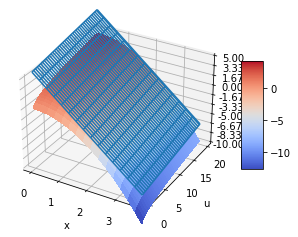

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# Fazer dados.
X = np.arange(0, 4, 0.25)
U = np.arange(0, 20, 0.25)
X, U = np.meshgrid(X, U)
DXDT = -X**2 + np.sqrt(U)
LIN = -4.0 * (X-2.0) + 1.0/8.0 * (U-16.0)

# Traçar a superfície.
surf = ax.plot_wireframe(X, U, LIN)
surf = ax.plot_surface(X, U, DXDT, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Personalizar o eixo z.
ax.set_zlim(-10.0, 5.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Adicionar uma barra de cores que mapeia os valores às cores.
fig.colorbar(surf, shrink=0.5, aspect=5)

# Adicionar etiquetas
plt.xlabel('x')
plt.ylabel('u')

plt.show()

* __Parte C__: Simular um teste doublet com os modelos não lineares e lineares e comentar a adequação do modelo linear para representar a solução original da equação não linear.

O passo final é simular um teste doublet com os modelos não lineares e lineares.

Pequenas alterações de passo (+/-1): Pequenas mudanças de passo em u levam a respostas quase idênticas para as soluções lineares e não lineares. O modelo linearizado é localmente preciso.

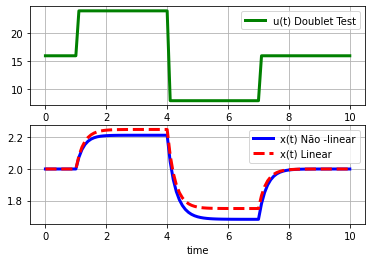

In [18]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# função que devolve dz/dt
def model(z,t,u):
    x1 = z[0]
    x2 = z[1]
    dx1dt = -x1**2 + np.sqrt(u)
    dx2dt = -4.0*(x2-2.0) + (1.0/8.0)*(u-16.0)
    dzdt = [dx1dt,dx2dt]
    return dzdt

# condições de estado estacionário
x_ss = 2.0
u_ss = 16.0

# condição inicial
z0 = [x_ss,x_ss]

# hora final
tf = 10

# número de pontos de tempo
n = tf * 10 + 1

# pontos de tempo
t = np.linspace(0,tf,n)

# entrada de passos
u = np.ones(n) * u_ss
# magnitude do passo
m = 8.0
# mudar até m no momento = 1.0
u[11:] = u[11:] + m
# mudar para baixo 2*m no momento = 4.0
u[41:] = u[41:] - 2.0 * m
# mudar até m no momento = 7.0
u[71:] = u[71:] + m

# Armazenamento
x1 = np.empty_like(t)
x2 = np.empty_like(t)
# registar as condições iniciais
x1[0] = z0[0]
x2[0] = z0[1]

# Resolve a equação
for i in range(1,n):
    # intervalo para o próximo passo
    tspan = [t[i-1],t[i]]
     # resolver para o próximo passo
    z = odeint(model,z0,tspan,args=(u[i],))
    # solução de armazenamento para a conspiração
    x1[i] = z[1][0]
    x2[i] = z[1][1]
     # próxima condição inicial
    z0 = z[1] 

# plota os resultados
plt.figure(1)
plt.subplot(2,1,1)
plt.plot(t,u,'g-',linewidth=3,label='u(t) Doublet Test')
plt.grid()
plt.legend(loc='best')
plt.subplot(2,1,2)
plt.plot(t,x1,'b-',linewidth=3,label='x(t) Não -linear')
plt.plot(t,x2,'r--',linewidth=3,label='x(t) Linear')
plt.xlabel('time')
plt.grid()
plt.legend(loc='best')
plt.show()